### ch3-2 Keras 簡介

- Keras 採用 MIT 條款
- Keras的架構：
    ```
    |----------------------------------|
    |             Keras                |
    |----------------------------------|
    | TensorFlow / Theano / CNTK / ... |
    |----------------------------------|
    | (CUDA / cuDNN)  |  (BLAS, Eigen) |
    |----------------------------------|
    | (GPU)           |  (CPU)         |
    |----------------------------------|
    ```
    
- Theano: Montreal大學 MILA 實驗室開發的
- TensorFlow: Google開發的
- GNTK: Microsoft開發的


### ch3-3 建立環境

- 主要使用Keras + tensorFlow (也可以是CNTK or Theano)
- 之前要用Ubuntu來安裝比較好，但目前(2019-11-12)在windows下安裝已順了
- 建議用NVIDIA的GPU


----

#### 我的安裝方式:

- 參考這一篇不錯 [link](http://wangwangtc.blogspot.com/2019/06/keras.html)

- 先打開anaconda navigator
- 在enviroments輸入tensorflow，按Create建立一個tensorflow要用的新環境 (跟base分開的)
- 點選「tensorflow」後，在右邊欄選`not installed`，在search輸入keras，選keras，再點下放的apply，就會找到相關套件(keras預設會把tensorflow一起裝)。在清單中再點apply就可以把keras裝好了

- --> 最後在keras的書的ch2的第一個demo這個anaconda的配置就error
- 參考這個看看有沒有解: http://beanobody.blogspot.com/2019/04/module-tensorflow-has-no-attribute.html

#### 採用Jumbo提供的安裝指令

- 前提是先安裝Anaconda

- 再以下面的指定建立環境
```
conda create -n cv python=3.7
activate cv
pip install -r requirements.txt
```

- 其中 requirements.txt 的內容為：
```
numpy==1.17.3
matplotlib==3.1.1
Cython==0.29.13
opencv-contrib-python==4.1.1.26
opencv-python==4.1.1.26
h5py==2.10.0
jupyter==1.0.0
pandas==0.25.2
scikit-learn==0.21.3
scipy==1.3.1
seaborn==0.9.0
tensorflow==2.0.0
Keras==2.3.1
```

## ch3-4 二元分類
2019-11-14

- IMDB資料集 (由IMDb的網路資料庫來的)

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 92s 5us/step


In [3]:
train_data[0] #每一個元性會是一個list代表一筆評論，每一筆評論的內文是以每個word為單位編號，因此會看到一堆數字，數字愈小的代表是常用字

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [4]:
train_labels[0] #因為結果只有二種 (正評, 負評) = (1, 0)

1

In [5]:
# 找出最大數字 --> 以 List Comprehensions 的語法找出來，比較簡潔，本書作者常用，因此要熟悉它
max([max(sequence) for sequence in train_data])

9999

In [6]:
# 如果好奇評論是在寫什麼，可以用下面程式將數字還原成英文單字：
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) #i-3是因為load_data()會自動將所有數字+3，因為0~2有特殊用途

1646592/1641221 [==============================] - 7s 4us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [18]:
reverse_word_index[1], reverse_word_index[2], reverse_word_index[3], reverse_word_index[4]

('the', 'and', 'a', 'of')

In [16]:
word_index['and']

2

----
- 2019-11-18

- ch3-4-2

In [20]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [27]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [35]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [36]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
# 3-4-4
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [39]:
# 3.8 訓練模型
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.5238 - acc: 0.8016 - val_loss: 0.4104 - val_acc: 0.8626
Epoch 2/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.3240 - acc: 0.9020 - val_loss: 0.3398 - val_acc: 0.8678
Epoch 3/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.2392 - acc: 0.9233 - val_loss: 0.2892 - val_acc: 0.8880
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1891 - acc: 0.9398 - val_loss: 0.2753 - val_acc: 0.8899
Epoch 5/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1556 - acc: 0.9505 - val_loss: 0.2762 - val_acc: 0.8882
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1284 - acc: 0.9608 - val_loss: 0.2821 - val_acc: 0.8883
Epoch 7/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1078 - acc: 0.9669 - val_loss: 0.3355 - 

In [40]:
history_dict = history.history

In [43]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

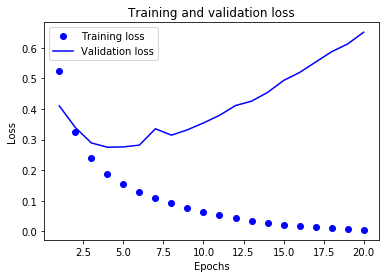

In [45]:
# 繪製 訓練與驗證的損失分數
%matplotlib inline

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- 在4個周期後，驗證資料的loss就變的愈來愈大 (雖然在訓練資料是愈來愈好) --> overfitting

In [46]:
device_list = []

In [48]:
dd = {'power_meter':{'a':1, 'b':2}, 'sun_meter':{'z':1, 'y':2}}


In [49]:
device_list.append(dd['power_meter'])

In [51]:
dd.pop('sun_meter')

{'z': 1, 'y': 2}

In [52]:
dd

{'power_meter': {'a': 1, 'b': 2}}

----
- 2019-11-26
- ch3-4-5

In [57]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.4632 - accuracy: 0.8272
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2750 - accuracy: 0.9062
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2103 - accuracy: 0.9264
Epoch 4/4
25000/25000 [==============================] - 2s 98us/step


In [58]:
results #損失分數, 準確度

[0.2986900279426575, 0.8805199861526489]

In [60]:
p1 = model.predict(x_test)

In [72]:
p2 = p1[p1>0.4]
p2[p2<0.6]
len(p2)

12337

- 延伸實作

In [73]:
# 再增加二個hidden layer

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.5811 - accuracy: 0.7126
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.4139 - accuracy: 0.8943
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.2668 - accuracy: 0.9219
Epoch 4/4
25000/25000 [==============================] - 2s 93us/step


In [75]:
results #損失分數, 準確度

[0.3125584250450134, 0.8794800043106079]

In [76]:
# 一樣的hidden layer，但是改為32 unit

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.4253 - accuracy: 0.8214
Epoch 2/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.2377 - accuracy: 0.9128
Epoch 3/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.1889 - accuracy: 0.9298
Epoch 4/4
25000/25000 [==============================] - 2s 95us/step


[0.32328700963020324, 0.8761199712753296]

In [77]:
# binary_crossentropy 改為 mse

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.1392 - accuracy: 0.8151
Epoch 2/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.0720 - accuracy: 0.9120
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.0553 - accuracy: 0.9317
Epoch 4/4
25000/25000 [==============================] - 2s 93us/step


[0.10040721739053726, 0.8665199875831604]

In [79]:
# 啟動函式改為tanh --> 以前在類神經很多人用的方法

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.3947 - accuracy: 0.8296
Epoch 2/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.2204 - accuracy: 0.9136
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.1721 - accuracy: 0.9343
Epoch 4/4
25000/25000 [==============================] - 3s 102us/step


[0.481348820476532, 0.8306400179862976]

In [80]:
# 啟動函式改為tanh --> 以前在類神經很多人用的方法

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.1325 - accuracy: 0.8160
Epoch 2/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.0651 - accuracy: 0.9142
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.0515 - accuracy: 0.9327
Epoch 4/4
25000/25000 [==============================] - 2s 91us/step


[0.09987003668546676, 0.8708000183105469]

In [82]:
# 啟動函式改為tanh --> 以前在類神經很多人用的方法

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.1278 - accuracy: 0.8330
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.0649 - accuracy: 0.9170
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.0501 - accuracy: 0.9364
Epoch 4/4
25000/25000 [==============================] - 2s 90us/step


[0.09604151120662689, 0.8750799894332886]

In [83]:
# 啟動函式改為tanh --> 以前在類神經很多人用的方法

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.1333 - accuracy: 0.8189
Epoch 2/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.0670 - accuracy: 0.9120
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.0515 - accuracy: 0.9352
Epoch 4/4
25000/25000 [==============================] - 2s 90us/step


[0.10668793509326875, 0.864799976348877]

----
## ch3-5 分類數位新聞專欄：多類別的分類問題

- 以路透社的數位新聞為例
- 路透社資料集(Reuters dataset)和IMDB, MNIST一樣，也內建在Keras中

In [84]:
# 路透社資料集
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 11s 5us/step


In [85]:
len(train_data), len(test_data)

(8982, 2246)

In [86]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 3s 6us/step


In [87]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [89]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [90]:
from keras import models
from keras import layers

# 定義模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 編譯模型
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [91]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [93]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs = 20, batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.0767 - accuracy: 0.9799 - val_loss: 0.0534 - val_accuracy: 0.9845
Epoch 2/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.0446 - accuracy: 0.9877 - val_loss: 0.0410 - val_accuracy: 0.9892
Epoch 3/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.0343 - accuracy: 0.9908 - val_loss: 0.0365 - val_accuracy: 0.9901
Epoch 4/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.0280 - accuracy: 0.9922 - val_loss: 0.0339 - val_accuracy: 0.9907
Epoch 5/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.0231 - accuracy: 0.9935 - val_loss: 0.0321 - val_accuracy: 0.9912
Epoch 6/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.0313 - val_accuracy: 0.9915
Epoch 7/20
7982/7982 [==============================] - 1s 105us/step - loss

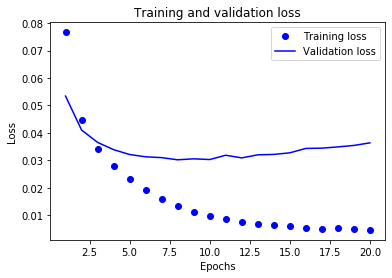

In [94]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [98]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

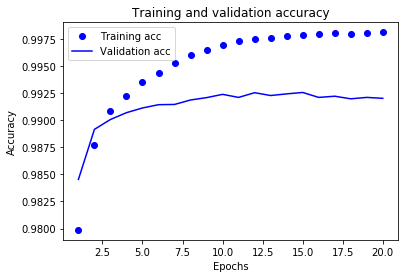

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 第9個訓練周期開始有overfitting發生，因此重頭訓練一個epoch=9的

In [100]:
from keras import models
from keras import layers

# 定義模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 編譯模型
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 訓練
model.fit(partial_x_train, partial_y_train
          , epochs=9, batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.0796 - accuracy: 0.9795 - val_loss: 0.0546 - val_accuracy: 0.9841
Epoch 2/9
7982/7982 [==============================] - 1s 110us/step - loss: 0.0452 - accuracy: 0.9875 - val_loss: 0.0409 - val_accuracy: 0.9895
Epoch 3/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.0340 - accuracy: 0.9909 - val_loss: 0.0356 - val_accuracy: 0.9904
Epoch 4/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.0275 - accuracy: 0.9924 - val_loss: 0.0330 - val_accuracy: 0.9909
Epoch 5/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.0226 - accuracy: 0.9936 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 6/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.0188 - accuracy: 0.9945 - val_loss: 0.0312 - val_accuracy: 0.9915
Epoch 7/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.015

In [101]:
# 對新資料進行預測

In [102]:
predictions = model.predict(x_test)

In [103]:
predictions[0].shape

(46,)

In [105]:
max(predictions[0])

0.94103616

In [106]:
predictions[0]

array([3.4247551e-05, 9.6719768e-06, 3.4964730e-06, 9.4103616e-01,
       5.7705980e-02, 2.0725856e-06, 9.6832182e-06, 5.4241677e-06,
       8.8945402e-05, 3.5822701e-05, 1.5153906e-06, 5.7772661e-05,
       1.2772246e-05, 9.1854599e-06, 3.9836264e-06, 4.6499508e-06,
       6.5653127e-05, 8.4352716e-05, 1.2360835e-05, 2.1280197e-04,
       1.7614753e-04, 1.6433298e-05, 8.5754891e-07, 8.3309336e-05,
       6.2246033e-07, 2.0525331e-05, 2.1452468e-07, 8.2103716e-06,
       1.4784864e-04, 1.5100895e-05, 1.8892418e-07, 3.3468964e-06,
       4.2332329e-05, 2.3500281e-06, 3.7093644e-06, 6.0774659e-07,
       1.2482774e-06, 1.0594962e-06, 2.2054187e-06, 4.6385481e-05,
       7.4351506e-06, 3.9411697e-07, 1.3089672e-06, 1.3644682e-05,
       4.2987708e-06, 3.7179993e-06], dtype=float32)

In [107]:
np.argmax(predictions[0])

3

- 

In [108]:
from keras import models
from keras import layers

# 定義模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 編譯模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練
model.fit(partial_x_train, partial_y_train
          , epochs=20, batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 129us/step - loss: 3.5638 - accuracy: 0.0530 - val_loss: 3.3253 - val_accuracy: 0.0680
Epoch 2/20
7982/7982 [==============================] - 1s 103us/step - loss: 3.1275 - accuracy: 0.2334 - val_loss: 2.9902 - val_accuracy: 0.3780
Epoch 3/20
7982/7982 [==============================] - 1s 100us/step - loss: 2.7526 - accuracy: 0.4053 - val_loss: 2.6429 - val_accuracy: 0.3950
Epoch 4/20
7982/7982 [==============================] - 1s 102us/step - loss: 2.3719 - accuracy: 0.4198 - val_loss: 2.3030 - val_accuracy: 0.4040
Epoch 5/20
7982/7982 [==============================] - 1s 106us/step - loss: 2.0197 - accuracy: 0.4870 - val_loss: 2.0025 - val_accuracy: 0.5430
Epoch 6/20
7982/7982 [==============================] - 1s 104us/step - loss: 1.7237 - accuracy: 0.6035 - val_loss: 1.7764 - val_accuracy: 0.5840
Epoch 7/20
7982/7982 [==============================] - 1s 103us/step - loss

In [109]:
from keras import models
from keras import layers

# 定義模型
model = models.Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 編譯模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練
model.fit(partial_x_train, partial_y_train
          , epochs=20, batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.9534 - accuracy: 0.5874 - val_loss: 1.2594 - val_accuracy: 0.7100
Epoch 2/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.9939 - accuracy: 0.7781 - val_loss: 1.0144 - val_accuracy: 0.7740
Epoch 3/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.6427 - accuracy: 0.8616 - val_loss: 0.9079 - val_accuracy: 0.7980
Epoch 4/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.4474 - accuracy: 0.9055 - val_loss: 0.8905 - val_accuracy: 0.8040
Epoch 5/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.3146 - accuracy: 0.9336 - val_loss: 0.8707 - val_accuracy: 0.8160
Epoch 6/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.2412 - accuracy: 0.9442 - val_loss: 0.8620 - val_accuracy: 0.8260
Epoch 7/20
7982/7982 [==============================] - 1s 146us/step - loss